#Projet modèles linéaires et analyse
**Avant toute chose, assurez vous de copier ce notebook et de travailler uniquement sur votre copie personnelle**

Préambule
---------

Le projet utilisera le jeu de données `iris`. Le projet illustre le lien entre les méthodes formelles vues en cours et des méthodes classiques d'analyse de données qui utilisent le modèle de régression linéaire.




Lecture des données
--------

La première fonction consiste à lire le fichier de données. Celle-ci vous est donnée :

In [ ]:
import numpy as np
import pandas as pa

def read_iris():
  """
  Reads the dataset from its permanent web location
  """
  url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
  new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
  dataset = pa.read_csv(url, names=new_names, skiprows=0, delimiter=',')
  dataset.drop('iris_class',inplace=True,axis=1)  #removes the non numeric column
  return dataset

dataframe = read_iris()
print(dataframe)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


Le jeu de données lu est un objet de la classe `pandas.DataFrame`. 
Ce premier objet sera utile pour faire l'analyse de données.
Pour obtenir un `array numpy` on utilise la conversion suivante : 

In [ ]:
X = dataframe.to_numpy()
print(X)   #correspond à la "design matrix" et à la notation des notes de cours 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Implémenter le modèle de régression linéaire
-------------
La première partie du projet consiste à implémenter un modèle de régression linéaire en utilisant les algorithmes présentés dans le chapitre 9 du cours : 
algorithme de Newton et algorithme de descente de gradient. De plus on demandera de tester également un algorithme issu de la librairie `numpy`. Les signatures de fonctions à implanter sont les suivantes:


In [ ]:
#useful imports for the exercise:
#     norm computes the norm of a vector 
#     inv computes the inverse of a matrix
#     lstsq is a predefined function in numpy that already implements least squares regresssion and can be used for checking your solution 
# you have to find out in the online documentation how to use them

from numpy.linalg import norm,inv,lstsq
from numpy.random import random # (optional) generates random vectors


#Exercises to fill in...

def leastsq_newton(x,y,prec,add_bias=True):
  """
  Args: 
     X (np.array): design matrix, input values
     y (np.array): reference output values (vector) 
     prec (float): the precision for the stopping criterion
     add_bias    : if false we model functions of the form f(x) = ax_1 + ... + ax_k 
                   if true we model functions of the form  f(x) = ax_1 + ... + ax_k + b
  Returns:
     np.array : the vector theta of parameters
  """
  x_trans = np.transpose(x)
  h = np.linalg.inv(np.matmul(x_trans,x))
  theta = np.zeros(len(x_trans))
  theta1 = np.ones(len(x_trans))
  i = 0
  while norm(theta1 - theta) > prec :
    l = np.matmul(x_trans, np.matmul(x, theta) - y)
    theta, theta1 = theta1, theta - np.matmul(h,l)
    i += 1
    print(i, l)
  print()
  return theta1

def leastsq_gradient(x,y,alpha0,prec,add_bias=True):
  '''
  Args: 
     X (np.array)  : design matrix, input values
     y (np.array)  : reference output values (vector) 
     alpha0 (float): pas de gradient
     prec (float)  : the precision for the stopping criterion
     add_bias      : if false we model functions of the form f(x) = ax_1 + ... + ax_k 
                     if true we model functions of the form  f(x) = ax_1 + ... + ax_k + b
  Returns:
     np.array : the vector theta of parameters
  '''
  x_trans = np.transpose(x)
  theta = np.zeros(len(x_trans))
  theta1 = np.ones(len(x_trans))
  i, alpha = 0, alpha0
  while norm(theta1 - theta) > prec :
    l = np.matmul(x_trans, np.matmul(x, theta) - y)
    tmp = theta1
    theta1 = theta - alpha*l
    theta = tmp
    #print(i, l)
    i += 1
  return theta1



#sepal_length  sepal_width  petal_length  petal_width
sepal_length = X[:,0]
sepal_width = X[:,1]
petal_length = X[:,2]
petal_width = X[:,3]

x1 = np.vstack([sepal_width, np.ones(len(X))]).T
y1 = np.array(sepal_length)
lstsq1 = np.linalg.lstsq(x1,y1, rcond=None)[0]
newton1 = leastsq_newton(x1, y1, 0.1)
gradient1 = leastsq_gradient(x1, y1, 0.0001, 0.000000001)

x2 = np.vstack([petal_width, np.ones(len(X))]).T
y2 = np.array(petal_length)
lstsq2 = np.linalg.lstsq(x2,y2, rcond=None)[0]
newton2 = leastsq_newton(x2, y2, 0.1)
gradient2 = leastsq_gradient(x2, y2, 0.0001, 0.000000001)

x3 = np.vstack([petal_width, sepal_length, sepal_width, np.ones(len(X))]).T
y3 = y2
lstsq3 = np.linalg.lstsq(x3,y3, rcond=None)[0]
newton3 = leastsq_newton(x3, y3, 0.1)
gradient3 = leastsq_gradient(x3, y3, 0.0001, 0.000000001)


print("Modèle sepal_length = a * sepal_width + b")
print("Fonction Python lstsq :", lstsq1)
print("Fonction écrite Newton :", newton1)
print("Fonction écrite Gradient :", gradient1)
print()

print("Modèle petal_length = a * petal_width + b")
print("Fonction Python lstsq :", lstsq2)
print("Fonction écrite Newton :", newton2)
print("Fonction écrite Gradient :", gradient2)
print()

print("Modèle petal_length = a_1 * petal_width + a_2 * sepal_length + a_3 * sepal_width + b")
print("Fonction Python lstsq :", lstsq3)
print("Fonction écrite Newton :", newton3)
print("Fonction écrite Gradient :", gradient3)

1 [-2670.98  -876.5 ]
2 [-785.83 -268.4 ]

1 [-868.97 -563.8 ]
2 [-386.87 -234.  ]

1 [ -868.97 -3484.25 -1673.91  -563.8 ]
2 [1272.31 6414.73 3413.75 1100.6 ]

Modèle sepal_length = a * sepal_width + b
Fonction Python lstsq : [-0.20887029  6.48122321]
Fonction écrite Newton : [-0.20887029  6.48122321]
Fonction écrite Gradient : [-0.20887029  6.4812232 ]

Modèle petal_length = a * petal_width + b
Fonction Python lstsq : [2.22588531 1.09057215]
Fonction écrite Newton : [2.22588531 1.09057215]
Fonction écrite Gradient : [2.22588531 1.09057215]

Modèle petal_length = a_1 * petal_width + a_2 * sepal_length + a_3 * sepal_width + b
Fonction Python lstsq : [ 1.44571962  0.7303629  -0.65139445 -0.25266445]
Fonction écrite Newton : [ 1.44571962  0.7303629  -0.65139445 -0.25266445]
Fonction écrite Gradient : [ 1.44571962  0.7303629  -0.65139445 -0.25266445]


Testez votre implémentation à l'aide des modèles suivants :
* `sepal_length = a * sepal_width + b `
* `petal_length = a * petal_width + b `
* `petal_length = a_1 * petal_width + a_2 * sepal_length + a_3 * sepal_width + b`

Chaque modèle sera testé à l'aide de vos fonctions `leastsq_newton` et `leastsq_gradient`. Il est demandé d'afficher au moins à chaque itération le numéro d'itération et la valeur de la fonction de perte. C'est une bonne idée d'afficher la valeur des paramètres optimisés. 

Pour la méthode de descente de gradient vous allez devoir ajuster le pas de gradient *alpha*. Si vous choisissez de faire varier *alpha* au cours des iterations, il est conseillé de l'afficher également à chaque itération.

Finalement on peut utiliser les résultats de la fonction numpy `lstsq` comme référentiel de correction ([documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)). Cette documentation donne également une piste sérieuse sur la méthode à utiliser pour créer le biais.

La fonction de descente de gradient est plus lente que Newton, cependant les résultats sont plutôt similaires. Je ne sais pas cependant à quoi correspond l'espace dans `6.4812232 ]` et pourquoi il se trouve ici. 
J'ai souhaité faire varier alpha au cours des itérations, cependant cela ne fonctionnait pas. J'ai donc décidé de garder le même alpha tout au long de la fonction.
Comme il y a (vraiment) beaucoup d'itérations sur la fonction de descente de gradient, l'affichage à chaque itération était très peu lisible. J'ai par conséquent commenté mes print afin que vous puissiez les afficher si vous le souhaitez.


Interprétation des coefficients
-----------------


Ce dernier exercice vous fait découvrir le potentiel d'interprétation des paramètres d'un modèle de régression linéaire en analyse de données.
Il illustre aussi certaines limitations

Considérons à nouveau les deux modèles :
*  `sepal_length = a * sepal_width + b`
*  `petal_length = a * petal_width + b`

En utilisant `matplotlib` faire les graphiques (nuages de points) suivants :
*  `sepal_length` en fonction de `sepal_width`
*  `petal_length` en fonction de `petal_width`


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# pour comparer des graphiques, il est en général impératif que les échelles correspondent
# est-ce le cas par défaut ? si non, lire la doc matplotlib (https://matplotlib.org/users, xlim, ylim) 
# et trouver comment faire pour imposer une échelle aux graphiques.

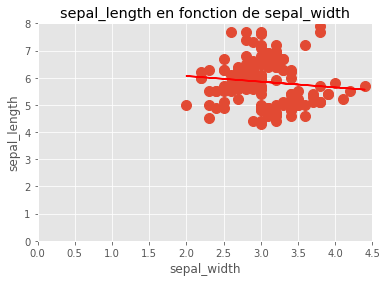

In [ ]:
plt.plot(sepal_width, sepal_length, 'o', label='Original data', markersize=10)
al, bl = lstsq1
plt.plot(x1, al*x1 + bl, 'r', label='Fitted line')
plt.title('sepal_length en fonction de sepal_width')
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.xlim(0,4.5)
plt.ylim(0,8)
plt.show()

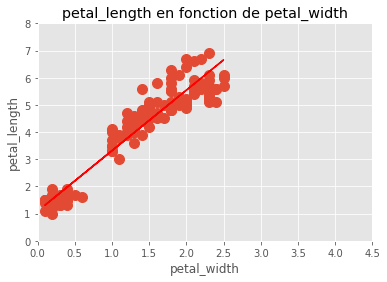

In [ ]:
plt.plot(petal_width, petal_length, 'o', label='Original data', markersize=10)
a2l, b2l = lstsq2
plt.plot(x2, a2l*x2 + b2l, 'r', label='Fitted line')
plt.title('petal_length en fonction de petal_width')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.xlim(0,4.5)
plt.ylim(0,8)
plt.show()

En vous rappelant la théorie, ou en comparant la valeur des paramètres des modèles et l'allure des nuages de points correspondants, pouvez-vous identifier un lien qui permettrait d'interpréter les paramètres du modèle de régression ? (vous pouvez vous inspirer de la documentation de `lstsq` [ici](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html))

On remarque que lorsque dans le modèle petal_length en fonction de petal_width, les valeurs semblent (à peu près) proportionnelles. En revanche, ce n'est pas le cas dans le modèle de sepal_length en fonction de sepal_width.



Considérons à nouveau le modèle :
* `petal_length = a_1 * petal_width + a_2 * sepal_length + a_3 * sepal_width + b`

Les coefficients de `sepal_width` et `petal_width` sont-ils les mêmes que dans les cas précédents ? comment expliquer la différence ?

Les coefficients sont différents car il y a plus de paramètres, et l'agencement fait que la fonction renvoie des coefficients différents.